In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Looking at the features

In [3]:
data = pd.read_csv('http://www.dsi.uminho.pt/~pcortez/forestfires/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Compute Local Concentration Measurements

In [4]:
#three ways to compute the MEAN
#keep in mind 'data' is our variable from the current data set
from statistics import mean

a1 = data['temp'].mean()   #pandas function
a2 = mean(data['temp'])    #statistics function
a3 = np.mean(data['temp']) #numpy function

display(a1,a2,a3)

18.88916827852998

18.88916827852998

18.88916827852998

In [14]:
#three ways to calculate MODE
#numpy does not have mode calculation, so use statistics instead
from statistics import mode
from scipy import stats

b1 = data['temp'].mode()     #pandas function
b2 = mode(data['temp'])      #statistics function (will not work bc two modes are found)
b3 = stats.mode(data['temp'])#stats function from scipy

display(b1,b3)

0    17.4
1    19.6
dtype: float64

ModeResult(mode=array([17.4]), count=array([8]))

In [11]:
#three ways to calculate median
from statistics import median

c1 = data['temp'].median()     #pandas function
c2 = median(data['temp'])      #statistics function
c3 = np.median(data['temp'])   #numpy function

display(c1,c2,c3)

19.3

19.3

19.3

### Compute Dispersion

In [13]:
#three ways to compute standard deviation, not that the values are similar but not identical
from statistics import stdev

d1 = data['temp'].std()     #pandas function
d2 = stdev(data['temp'])    #statistics function
d3 = np.std(data['temp'])   #numpy function

print(d1,d2,d3)

5.806625349573503 5.806625349573505 5.8010069395983646


In [15]:
#compute variance
from statistics import variance

e1 = data['temp'].var()     #pandas function
e2 = variance(data['temp']) #statistics function
e3 = np.var(data['temp'])   #numpy function

display(e1,e2,e3)

33.7168979503096

33.71689795030963

33.65168151326838

### Shape

In [16]:
#skewness
from scipy.stats import skew

f1 = data['temp'].skew()    #pandas function
f2 = skew(data['temp'])     #scipy stats

display(f1,f2)

-0.331172237347285

-0.3302106140354586

In [17]:
#kurtosis
from scipy.stats import kurtosis

g1 = data['temp'].kurt()    #pandas function
g2 = kurtosis(data['temp']) #scipy stats

display(g1,g2)

0.1361655076587991

0.12326917606611909

### Use the Describe Method to compute all at once

In [18]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Visualization

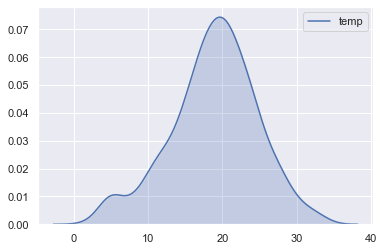

In [19]:
#simple visualization of the temperature
import seaborn as sns

sns.set(color_codes=True)
sns.kdeplot(data['temp'], shade=True)

NameError: name 'result' is not defined

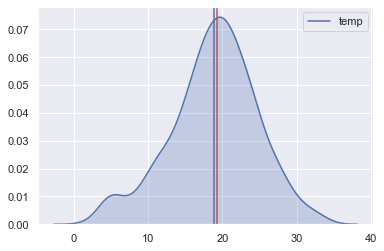

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.kdeplot(data['temp'], shade=True)

#adding some lines that indicate mean and median values
plt.axvline(data['temp'].mean(), 0, 1)
plt.axvline(data['temp'].median(), 0, 1, color='r')    #what do the 0s and 1s do here?

#adding quartile lines
plt.axvline(result['temp']['25%'], 0, 1, color='g')
plt.axvline(result['temp']['75%'], 0, 1, color='g')

#calculate outliers using the IQR
IQR = result['temp']['75%'] - result['temp']['25%']
upper_outliers = result['temp']['75%'] + 1.5*IQR
upper_outliers = result['temp']['25%'] - 1.5*IQR

#plot outliers
plt.axvline(upper_outliers, 0, 1, color='p')
plt.axvline(lower_outliers, 0, 1, color='p')

# Univariate Distribution Plots

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [27]:
#create a normal distribution
np.random.seed(0)
mu, sigma = 0, 1

data = np.random.normal(mu, sigma, 1000)

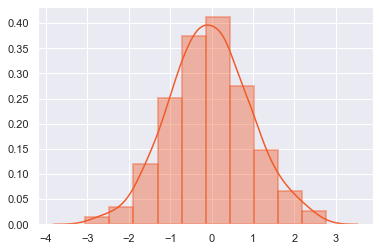

In [34]:
#use seaborn to creat a HISTOGRAM
p = sns.distplot(data,
                 color='#F15B2A',                                      #sets color
                 hist_kws=dict(edgecolor='#F15B2a', linewidth=2),      #sets features in histogram
                 bins=10,                                              #set number of bins
                 kde=True)                                            #default true, false to exclude line

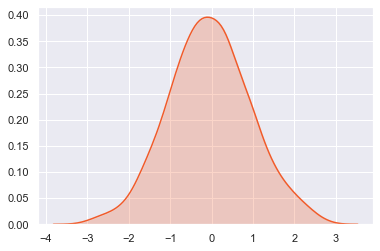

In [35]:
#plot just the density function
p = sns.kdeplot(data, color='#F15B2A', shade=True)

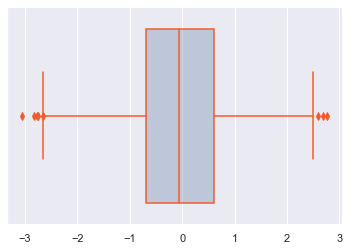

In [42]:
#box plot
p = sns.boxplot(data)

#customizations using loops
for e in p.artists:
    r, g, b, a = e.get_facecolor()
    e.set_facecolor((r, g, b, .3))
    
for i, artist in enumerate(p.artists):
    artist.set_edgecolor('#F15B2A')
    
for j in range(0,6):
    line = p.lines[j]
    line.set_color('#F15b2a')
    line.set_mfc('#f15b2a')
    line.set_mec('#f15b2a')

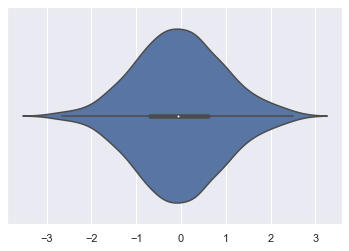

In [43]:
#violin plot using seaborn
p = sns.violinplot(data)

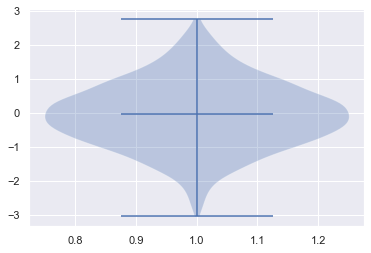

In [45]:
#using matplotlib to create violin plot
parts = plt.violinplot(data, vert=True, showmeans=True)

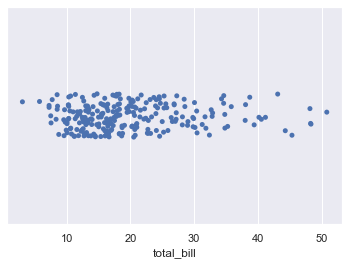

In [52]:
#strip plot using seaborn
tips = sns.load_dataset('tips')
p = sns.stripplot(x=tips['total_bill'], jitter = 1)

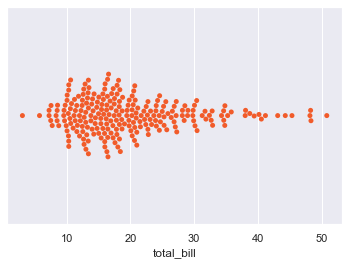

In [53]:
#Swarm plot with seaborn
p = sns.swarmplot(x=tips['total_bill'], color='#f15b2a')

# Univariate Comparison Plots

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [55]:
tips = sns.load_dataset('tips')

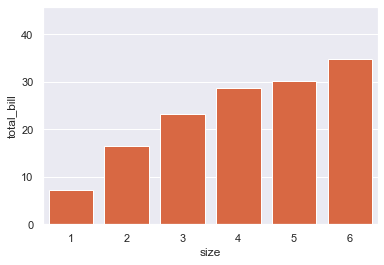

In [56]:
#create bar chart of total bill vs size of party
ax = sns.barplot('size',            #horizontal axis
                 y='total_bill',    #vertical axis
                 data=tips,         #dataset
                palette=['#F15b2a'],#set color
                 errwidth=0)    
#seems the bigger the group the higher the bill

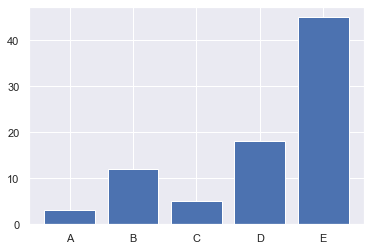

In [58]:
#using matplotlib to create a bar chart
value = [3,12,5,18,45]
label = ('A','B','C','D','E')
pos = np.arange(len(label))

plt.bar(pos, value)
plt.xticks(pos, label)
plt.show()

In [60]:
#create a dataframe of time vs sunlight
import pandas as pd

df = pd.DataFrame(data={'time':[6,7,8,9,10],
                      'sun_light':[50,80,100,300,170]})
df.head()

,time,sun_light
0,6,50
1,7,80
2,8,100
3,9,300
4,10,170


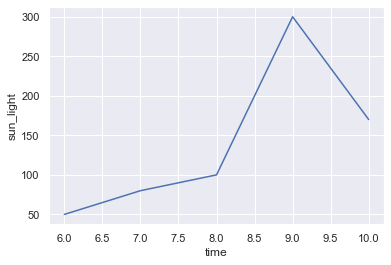

In [61]:
#line plot with seaborn
ax = sns.lineplot(x='time', y='sun_light', data=df)

In [63]:
#add a second variable to the dataframe
df['wind_speed'] = [46,98,110,70,150]

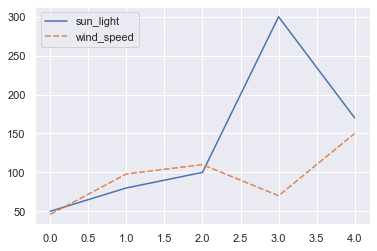

In [64]:
#line plot with multiple variables using seaborn
ax = sns.lineplot(data=[df['sun_light'], df['wind_speed']])
#notice we miss the time variable on the x-axis

In [65]:
#use melt() to change the shape of the data
pd.melt(df, ['time'])

,time,variable,value
0,6,sun_light,50
1,7,sun_light,80
2,8,sun_light,100
3,9,sun_light,300
4,10,sun_light,170
5,6,wind_speed,46
6,7,wind_speed,98
7,8,wind_speed,110
8,9,wind_speed,70
9,10,wind_speed,150


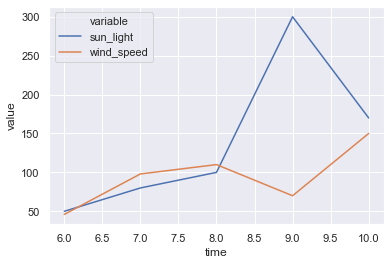

In [66]:
ax = sns.lineplot(x='time', y='value', hue='variable', data=pd.melt(df, ['time']))

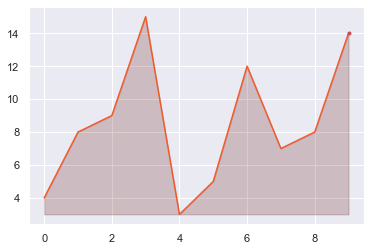

In [69]:
#line charts with matplotlib
data = [4, 8, 9, 15, 3, 5, 12, 7, 8, 14]
plt.plot(data, color='#F15b2a')

#can fill the area below the line
plt.fill_between(range(len(data)), data, len(data)*[min(data)], alpha=0.2, color="#550000")

#plot a point at the end
plt.plot(len(data)-1, data[-1], 'r.')

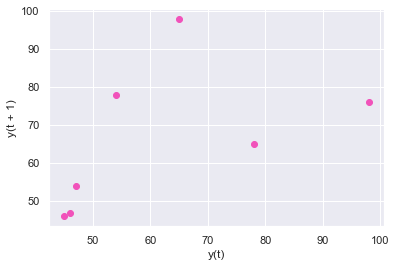

In [72]:
temp_series = pd.DataFrame(data={'temperature':[45,46,47,54,78,65,98,76]})

pd.plotting.lag_plot(temp_series, lag=1, c='#f152ba')

In [73]:
#circular area chart
#create dataframe
subjects = {'Maths':8, 'Language':7, 'Technology':10, 'Natural Science':6}
df = pd.DataFrame(data=subjects, index=['John'])
df

,Maths,Language,Technology,Natural Science
John,8,7,10,6


In [74]:
#convert grades to a lit and copy the first element as the last
values = df.iloc[0].tolist()  #creates list
values.append(values[0])      #adds first value to end of list
values

[8, 7, 10, 6, 8]

In [75]:
#compute the angles in radians
angles = [a/4 * 2 * np.pi for a in range(4)]
angles.append(angles[0])
angles

[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]

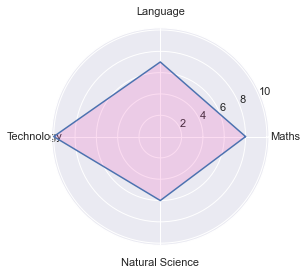

In [79]:
plt.subplot(111, polar=True)     #how does 111 function here?
plt.xticks(angles[:-1], subjects.keys())
plt.plot(angles, values)
plt.fill(angles, values, '#F152ba', alpha=0.2)

### Cartograms and Geoplots

In [128]:
#install geopandas
!pip install geopandas
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install mapclassify
!pip install geoplot

  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Student\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-9fd4whlu\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-9fd4whlu\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Student\AppData\Local\Temp\pip-pip-egg-info-tqet4dos'
         cwd: C:\Users\Student\AppData\Local\Temp\pip-install-9fd4whlu\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full c

  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Student\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-1tr4keff\\cartopy\\setup.py'"'"'; __file__='"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-1tr4keff\\cartopy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Student\AppData\Local\Temp\pip-pip-egg-info-vqj34zla'
         cwd: C:\Users\Student\AppData\Local\Temp\pip-install-1tr4keff\cartopy\
    Complete output (3 lines):
    C:\Users\Student\AppData\Local\Temp\pip-install-1tr4keff\cartopy\setup.py:104: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
      warnings.warn(
    Proj 4.9.0 must be installed.
    ------------------------------------

  Using cached geoplot-0.4.1-py3-none-any.whl (28 kB)
  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Student\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-ibi1oqvc\\cartopy\\setup.py'"'"'; __file__='"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-ibi1oqvc\\cartopy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Student\AppData\Local\Temp\pip-pip-egg-info-z85qtd_t'
         cwd: C:\Users\Student\AppData\Local\Temp\pip-install-ibi1oqvc\cartopy\
    Complete output (3 lines):
    C:\Users\Student\AppData\Local\Temp\pip-install-ibi1oqvc\cartopy\setup.py:104: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
      warnings.warn(
    Proj 4.9.0 must be installed.
    ------------------------------------

In [129]:
import geopandas
import geoplot

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
df['gdp_pp'] = df['gdp_md_east'] / df['pop_est']
df.head()

ModuleNotFoundError: No module named 'geopandas'

In [130]:
#plotting the actual cartograph
geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(12,8))

NameError: name 'geoplot' is not defined

# Univariate Composition Plots

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

([<matplotlib.patches.Wedge at 0x1ac165a9b80>,
 [Text(-0.9526279613277876, 0.5499999702695114, ''),
  Text(0.9526280128224967, -0.5499998810780429, '')])

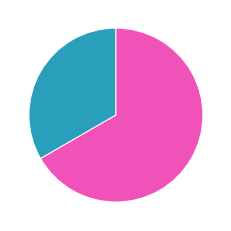

In [89]:
#uses matplotlib
data = [15, 30]

plt.subplots()
plt.pie(data, startangle=90, colors=['#2a9fbc', '#f152ba'])

In [90]:
!pip install pywaffle

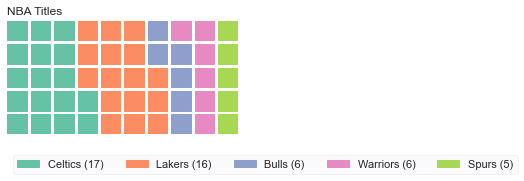

In [98]:
from pywaffle import Waffle

data = {'Celtics':17, 'Lakers':16, 'Bulls':6, 'Warriors':6, 'Spurs':5}
fig = plt.figure(FigureClass=Waffle, rows=5, values=data,
                title={'label': 'NBA Titles', 'loc': 'left'},
                labels=["{0} ({1})".format(k,v) for k, v in data.items()],
                legend={'loc':'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol':len(data), 'framealpha':0.2})

In [100]:
!pip install squarify

(0.0, 100.0, 0.0, 100.0)

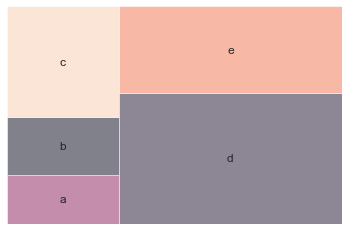

In [103]:
#create tree diagram with squarify
import squarify

data = [10, 12, 23, 54, 36]
labels = ['a','b','c','d','e']

squarify.plot(sizes=data, label=labels, alpha=0.5)
plt.axis('off')

In [112]:
#creating a waterfall chart
import numpy as np

category = ['lottery', 'buy_house', 'credit', 'party', 'sell_car', 'taxes']
data = {'amount':[150000, -35000, -17500, -5000, 103000, -17000]}

df = pd.DataFrame(data=data, index=category)
df.head()

,amount
lottery,150000
buy_house,-35000
credit,-17500
party,-5000
sell_car,103000


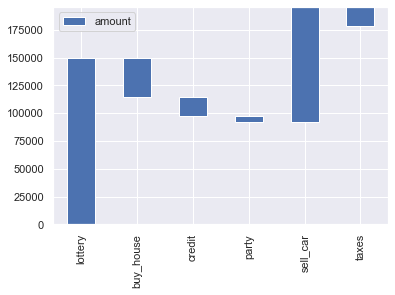

In [113]:
fig = df.plot(kind='bar',
             stacked=True,
             bottom=cumsum)

In [114]:
#add a column of shifted values, cumsum() returns the cumulative sum of elements along a given axis
cumsum = df.amount.cumsum().shift(1).fillna(0)
df.head()

,amount
lottery,150000
buy_house,-35000
credit,-17500
party,-5000
sell_car,103000


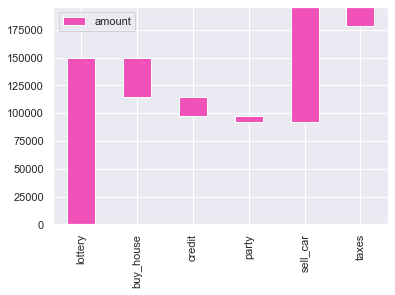

In [115]:
fig = df.plot(kind='bar',
             stacked=True,
             bottom=cumsum,
             color='#f152ba')

In [116]:
h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines

0         0.0
0         0.0
0    150000.0
1    150000.0
1    150000.0
1    115000.0
2    115000.0
2    115000.0
2     97500.0
3     97500.0
3     97500.0
3     92500.0
4     92500.0
4     92500.0
4    195500.0
5    195500.0
5    195500.0
5         NaN
Name: amount, dtype: float64

In [117]:
h_lines[1::3] = np.nan
h_lines

0         0.0
0         NaN
0    150000.0
1    150000.0
1         NaN
1    115000.0
2    115000.0
2         NaN
2     97500.0
3     97500.0
3         NaN
3     92500.0
4     92500.0
4         NaN
4    195500.0
5    195500.0
5         NaN
5         NaN
Name: amount, dtype: float64

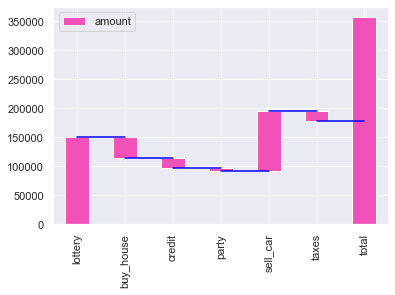

In [119]:
df.loc['total'] = df.sum().amount
cumsum.loc['total'] = 0

fig = df.plot(kind='bar',
             stacked=True,
             bottom=cumsum,
             color='#f152ba')

cumsum.loc['total'] = df[:-1].sum().amount
h_lines = cumsum.reset_index(drop=True).repeat(3).shift(-1)
h_lines[1::3] = np.nan

fig.plot(h_lines.index, h_lines.values, 'blue')

# Statistical Testing

In [120]:
import pandas as pd
from scipy import stats

In [121]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [123]:
setosa = df[df['class'] == 'Iris-setosa']
setosa.reset_index(inplace=True)  #example did not have underscore (version issue?)
setosa.head()

,index,sepal_length,sepal_width,petal_length,petal_width,class
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
versicolor = df[df['class'] == 'Iris-versicolor']
versicolor.reset_index(inplace=True)  #example did not have underscore (version issue?)
versicolor.head()

,index,sepal_length,sepal_width,petal_length,petal_width,class
0,50,7.0,3.2,4.7,1.4,Iris-versicolor
1,51,6.4,3.2,4.5,1.5,Iris-versicolor
2,52,6.9,3.1,4.9,1.5,Iris-versicolor
3,53,5.5,2.3,4.0,1.3,Iris-versicolor
4,54,6.5,2.8,4.6,1.5,Iris-versicolor


In [126]:
#now we have two dataframes based on class and can perform hypothesis testing
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])
#p-values is very close to zero so we reject the null hypothesis

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

In [127]:
#perform ANOVA test
#null hypothesis is that all means are the same
stats.f_oneway(df['sepal_width'][df['class'] == 'Iris-setosa'],
               df['sepal_width'][df['class'] == 'Iris-versicolor'],
               df['sepal_width'][df['class'] == 'Iris-virginica'])
#p-value again is very close to 0 so the null hypoethsis is rejected

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

# Analyzing Multivariate Data

In [131]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
tips = sns. load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Covariance

In [133]:
#creates an array. the diagonal of that array is the covariance (8.23)
#here we use numpy
np.cov(tips['total_bill'], tips['tip'])

array([[79.25293861,  8.32350163],
       [ 8.32350163,  1.91445464]])

In [134]:
#different way to do it using pandas
tips.cov()

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


### Correlation

In [135]:
#numpy correlation coefficient
np.corrcoef(tips['total_bill'], tips['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

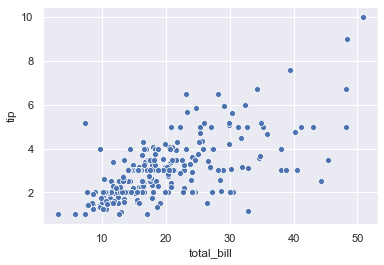

In [136]:
sns.scatterplot(x='total_bill', y='tip', data=tips)

In [137]:
#pandas function
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


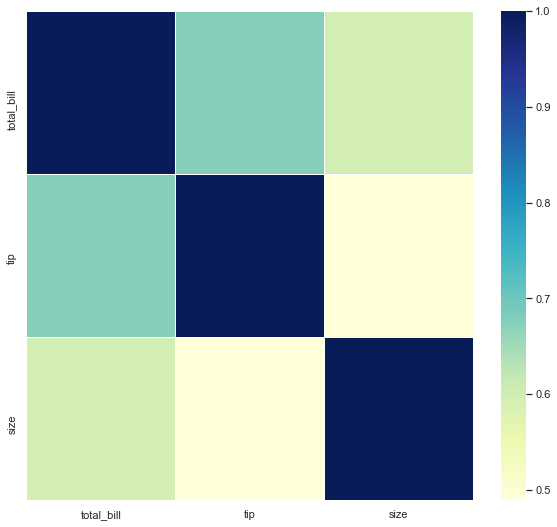

In [138]:
#storing these values as a variable and creating a heatmap
corrmat = tips.corr()
f, ax = plt.subplots(figsize=(10,9))

sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

### Multivariate Distribution Plots

In [139]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


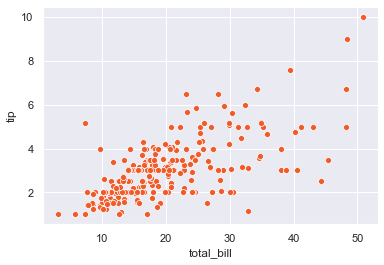

In [140]:
sns.scatterplot(x='total_bill', y='tip', data=tips, color='#f15b2a')

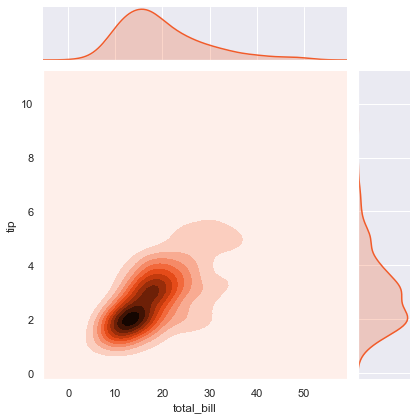

In [143]:
sns.jointplot(x='total_bill', y='tip', data=tips, color='#f15b2a', kind='kde')
#leave parameter kind out or try 'reg', 'hex'. or 'kde' for different kinds of charts

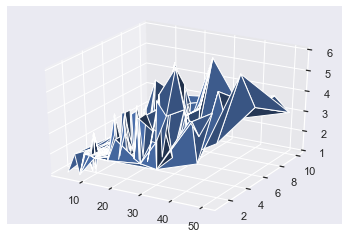

In [151]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(tips['total_bill'], tips['tip'], tips['size'])
#maybe not the best choice for this data bc its hard to see, can make tips negative to rotate, but still not the best

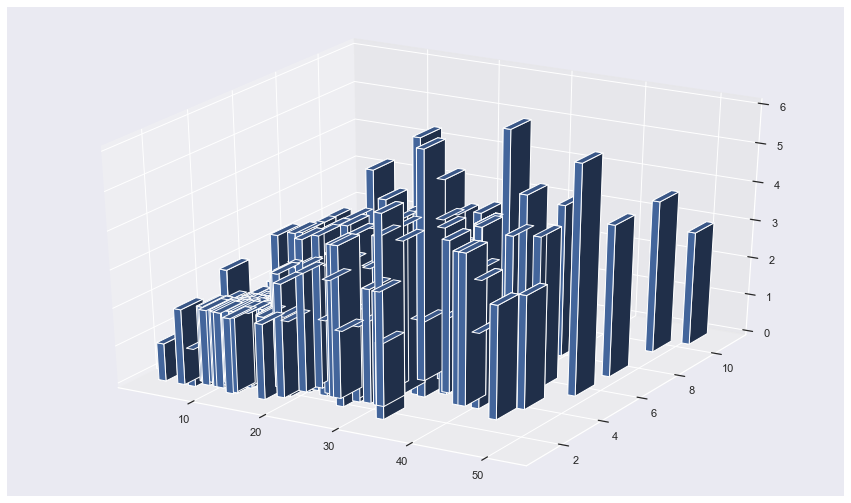

In [155]:
fig = plt.figure(figsize=(15, 9))
ax= fig.add_subplot(111, projection='3d')
ax.bar3d(tips['total_bill'], tips['tip'], np.zeros(len(tips['size'])), 1, 1, tips['size'])

#also not the best choice for this data

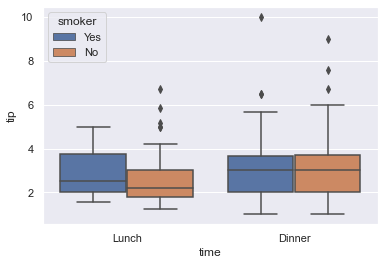

In [156]:
#boxplot to compare tips of smokers vs non-smokers
sns.boxplot(x='time', y='tip', hue='smoker', data=tips)

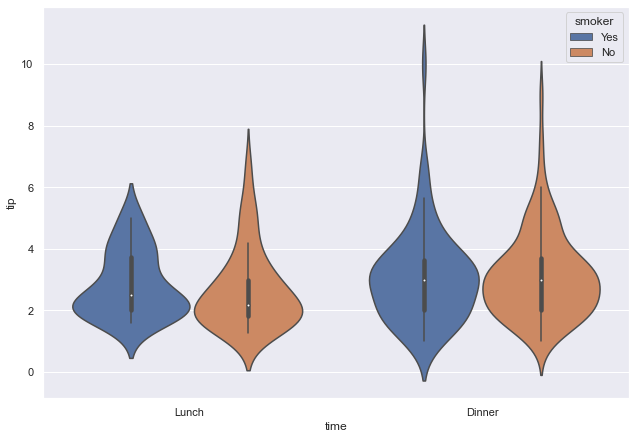

In [157]:
#same data, but with a violin plot
fig, ax = plt.subplots(figsize=(10.5, 7.2))
sns.violinplot(x='time', y='tip', hue='smoker', data=tips, ax=ax)

### Mutlivariate Comparison Charts

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 756x518.4 with 0 Axes>

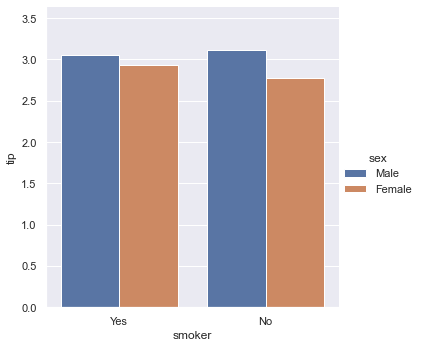

In [164]:
#create the dataframe
fig = plt.figure(figsize=(10.5, 7.2))
#create the plot using seaborn
sns.catplot(x='smoker', y='tip', hue='sex', data=tips, kind='bar', errwidth=0)

In [165]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [166]:
#use the pivot function to change the shape of the data
flights = flights.pivot('month', 'year', 'passengers') #(rows, columns, values)
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


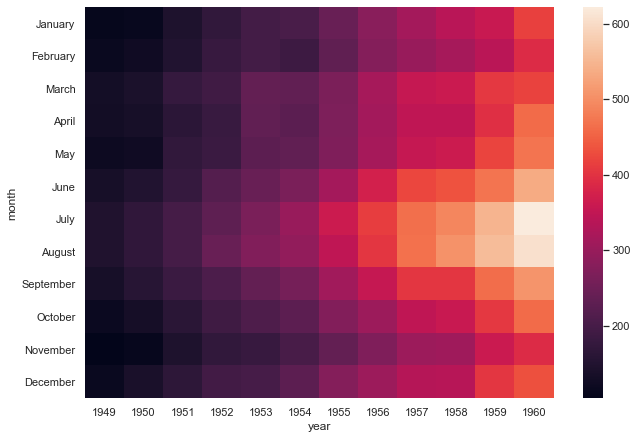

In [167]:
#create a heatmap which shows us the which months have the most flights each year
fig = plt.figure(figsize=(10.5, 7.2))
sns.heatmap(flights)

In [168]:
!pip install geopandas
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install mapclassify
!pip install geoplot

  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Student\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-phcbwmm3\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-phcbwmm3\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Student\AppData\Local\Temp\pip-pip-egg-info-rtwz0mo_'
         cwd: C:\Users\Student\AppData\Local\Temp\pip-install-phcbwmm3\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full c

  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Student\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-wttepddm\\cartopy\\setup.py'"'"'; __file__='"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-wttepddm\\cartopy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Student\AppData\Local\Temp\pip-pip-egg-info-rhy6imj6'
         cwd: C:\Users\Student\AppData\Local\Temp\pip-install-wttepddm\cartopy\
    Complete output (3 lines):
    C:\Users\Student\AppData\Local\Temp\pip-install-wttepddm\cartopy\setup.py:104: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
      warnings.warn(
    Proj 4.9.0 must be installed.
    ------------------------------------

  Using cached geoplot-0.4.1-py3-none-any.whl (28 kB)
  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached contextily-1.0.1-py3-none-any.whl (23 kB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Student\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-rg6hrdqw\\cartopy\\setup.py'"'"'; __file__='"'"'C:\\Users\\Student\\AppData\\Local\\Temp\\pip-install-rg6hrdqw\\cartopy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Student\AppData\Local\Temp\pip-pip-egg-info-pwoyyx9z'
         cwd: C:\Users\Student\AppData\Local\Temp\pip-install-rg6hrdqw\cartopy\
    Complete output (3 lines):
    C:\Users\Student\AppData\Local\Temp\pip-install-rg6hrdqw\cartopy\setup.py:104: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
      warnings.warn(
    Proj 4.9.0 must be installed.
    ------------------------------------

In [ ]:
#here is the code that should work once i figure out how to install these packages
import geopandas
import geoplot

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

df.head()

In [ ]:
geoplot.choropleth(df, hue='gdp_pp', cmap="Greens", figsize=(12, 8))

In [ ]:
#create geoplot that shows population based on scale and gdp based on population
geoplot.cartogram(df[df['continent']=='Africa'], scale="pop_est", hue="gdp_pp", limits=(0.2,1), figsize=(7,8))

### Multivariate Relationship Plots

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


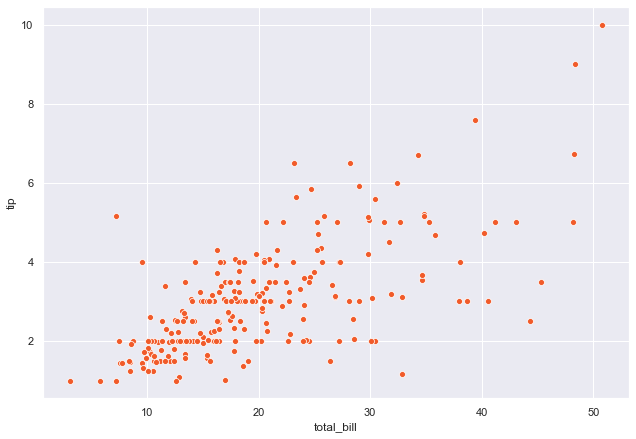

In [170]:
#scatterplot
fig, ax = plt.subplots(figsize=(10.5, 7.2))
sns.scatterplot(x='total_bill', y='tip', data=tips, color='#f15b2a', ax=ax)

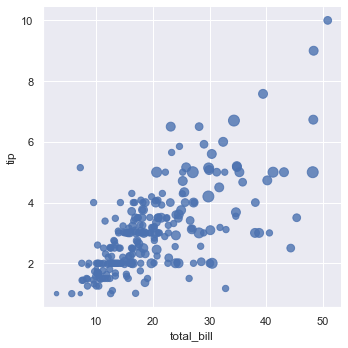

In [173]:
#turn this scatterplot into a bubble plot
sns.lmplot(x='total_bill', y='tip', data=tips,
          scatter_kws={'s':tips['size']*20},
          fit_reg=False)

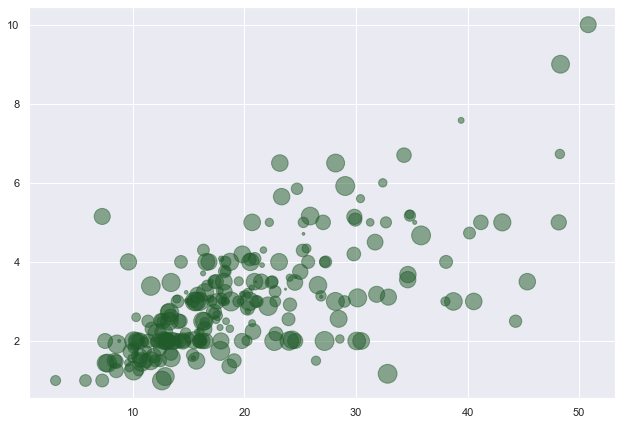

In [174]:
#
x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)

x = tips.total_bill
y = tips.tip
z = np.arange(len(x))

fig = plt.figure(figsize=(10.5, 7.2))
plt.scatter(x, y, s=z*1.5, alpha=0.5, c="#215b2a")

### Multivariate Composition Plots

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

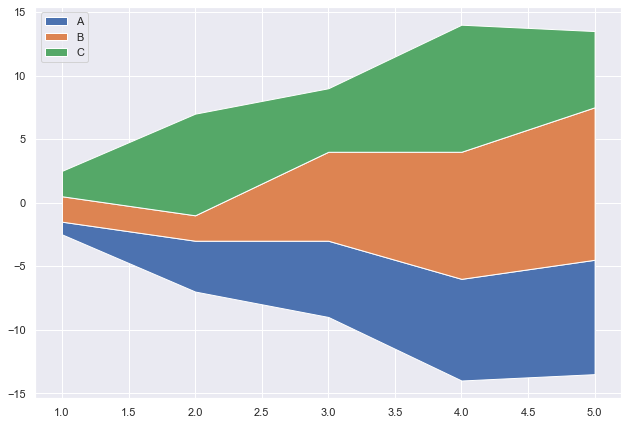

In [178]:
#stacked area chart
#create variables
x = range(1,6)
y = [[1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6]]

fig = plt.figure(figsize=(10.5, 7.2))
plt.stackplot(x, y, labels=["A", "B", "C"], baseline='sym')  #try baseline='zero' or 'weighted_wiggle'
plt.legend(loc='upper left')

<BarContainer object of 5 artists>

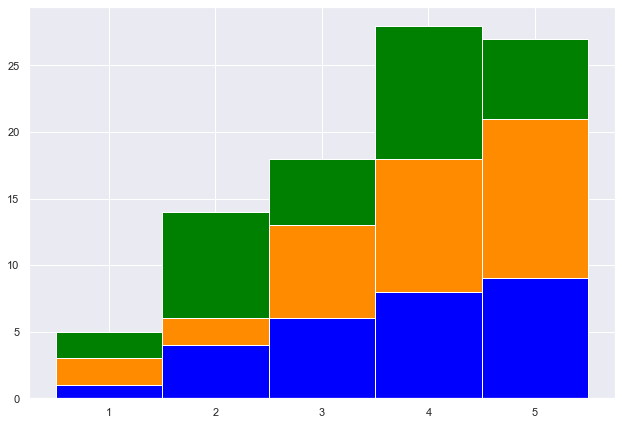

In [183]:
#plot a stacked bar with same data
fig = plt.figure(figsize=(10.5, 7.2))

#create three normal bar charts with matplotlib and define the bottom of each chart as the previous value
plt.bar(x, y[0], color='blue', edgecolor='white', width=1)
plt.bar(x, y[1], bottom=y[0], color='darkorange', edgecolor='white', width=1)
plt.bar(x, y[2], bottom=np.add(y[0], y[1]), color='green', edgecolor='white', width=1)

In [184]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [185]:
#create a tornado plot
#make all relevant values for the male category negative

tips.loc[tips['sex']=="Male", 'size'] = -tips.loc[tips['sex']=="Male", 'size']
group_col = 'sex'
order_of_bars = tips.day.unique()[::-1]
colors = ['blue', 'darkorange']

order_of_bars

[Fri, Thur, Sat, Sun]
Categories (4, object): [Sun, Sat, Thur, Fri]

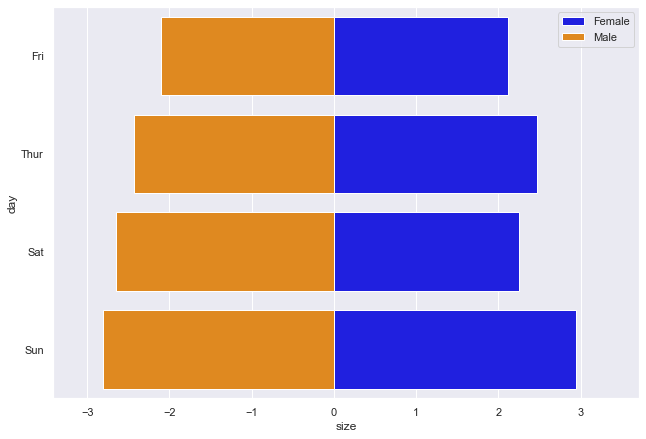

In [186]:
fig = plt.figure(figsize=(10.5, 7.2))

for c, group in zip(colors, tips[group_col].unique()):
    sns.barplot(x='size', y='day', data=tips.loc[tips[group_col]==group, :],
               order=order_of_bars, color=c, label=group, errwidth=0)
plt.legend()

# Feature Engineering and Selection

### Principal Component Analysis (PCA)

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [190]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(0.6829999999999998, 53.197, 0.55, 10.45)

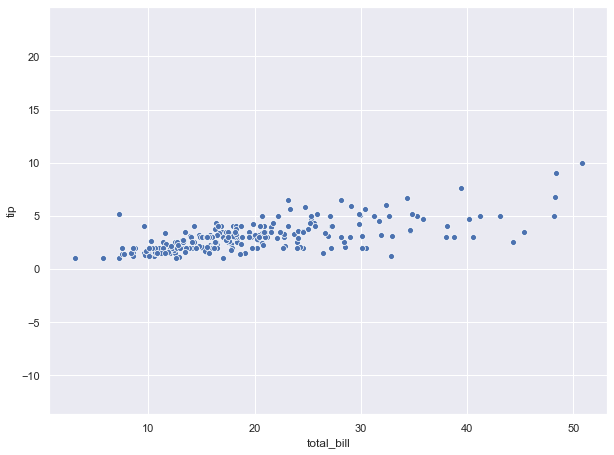

In [191]:
#plot equalized scatterplot
fig = plt.figure(figsize=(10, 7.5))
ax = sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.axis('equal')    #equalizes the values

In [192]:
#set variables and compute PCA
#create an array with total bill and tips data and apply standard Scaler

arr = tips[['total_bill', 'tip']].values
arr = StandardScaler().fit_transform(arr)

In [193]:
pca = PCA(n_components=2)
pca.fit(arr)

PCA(n_components=2)

In [194]:
print(f'PCA Components: \n {pca.components_} \n')
print(f'PCA Explained Variance: \n {pca.explained_variance_} \n')
print(f'PCA Explained Variance Ratio: \n {pca.explained_variance_ratio_} \n')
#first component explains ~84% of the variance and the second ~16%

PCA Components: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 

PCA Explained Variance: 
 [1.68263013 0.32560032] 

PCA Explained Variance Ratio: 
 [0.83786705 0.16213295] 



(-2.150227245218911,
 3.7607486596013318,
 -1.7730871743831187,
 5.396669728157747)

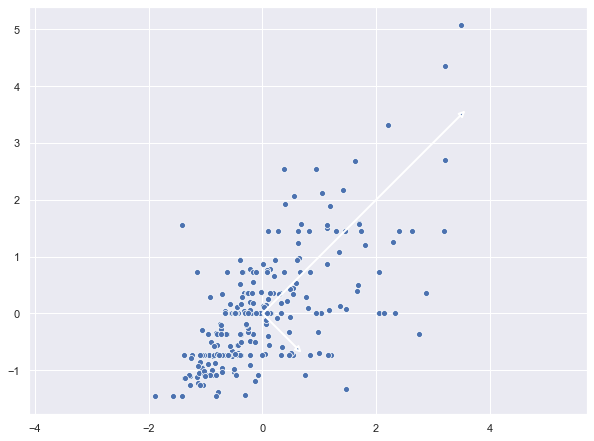

In [200]:
#visualize these components over the data set
fig = plt.figure(figsize=(10, 7.5))
sns.scatterplot(x=arr[:, 0], y=arr[:, 1])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * length
    ax = plt.gca()
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=dict(arrowstyle='-|>', linewidth=2, shrinkA=0, shrinkB=0))
    
plt.axis('equal')

### Factor Analysis

In [201]:
!pip install factor_analyzer==0.2.3

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [204]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [205]:
#Scikit-learn version

x = tips[['total_bill', 'tip', 'size']].values
df = tips[['total_bill', 'tip', 'size']]
df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [206]:
from sklearn.decomposition import FactorAnalysis

factor = FactorAnalysis(n_components=3, random_state=42).fit(x)
print(pd.DataFrame(factor.components_, columns=['total_bill', 'tip', 'size']))
#results show the third factor may not be needed

   total_bill       tip      size
0    8.827560  0.940874  0.572776
1   -0.054868  0.301503  0.195224
2   -0.000000  0.000000 -0.000000


In [208]:
#Factor Analyzer Version
#Bartlett's test, p-value close to zero, so it is appropriate to do factor analysis

chi2_value, p_value = calculate_bartlett_sphericity(df)
chi2_value, p_value

(259.0138522669992, 3.659554112936123e-56)

In [209]:
#kaiser-meyer-olkin test measures the suitability of data for factor analysis, value < 0.6 is considered inadequate
kmo, kmo_model = calculate_kmo(df)
kmo_model
#above the threshold but barely

0.6806842770940549

In [210]:
#choosing the number of factors
fa = FactorAnalyzer()
fa.analyze(df, 2, rotation=None)  #the 2 represents 3 factors (our max) 0,1,2

#check Eigenvalues
ev, vector = fa.get_eigenvalues()
ev

#Eigenvalue for first factor is much larger than the second two
#this gives us a hint as to how many factors we will use

,Original_Eigenvalues
0,2.178830
1,0.519127
2,0.302043


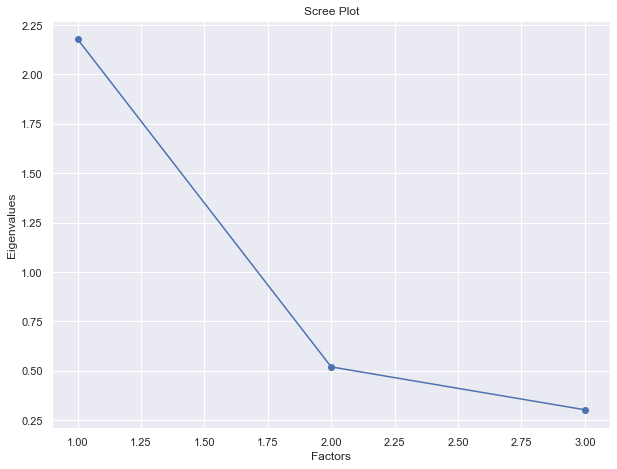

In [211]:
fig = plt.figure(figsize=(10, 7.5))
max_factors = df.shape[1] + 1

plt.scatter(range(1, max_factors), ev)
plt.plot(range(1, max_factors), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.show()
#best practice is to choose only the factors above one or above the elbow

In [214]:
#We should only keep the first factor but we will keep all three to see the result
fa = FactorAnalyzer()
fa.analyze(df, 3, rotation='varimax')
fa.loadings
#based on these findings we should keep the first or the first 2 factors

,Factor1,Factor2,Factor3
total_bill,0.640192,0.597084,0.104196
tip,0.684332,0.397291,0.003969
size,0.355807,0.618600,0.011273


In [215]:
#compute variance of each factor
fa.get_factor_variance()

,Factor1,Factor2,Factor3
SS Loadings,1.004755,0.897015,0.011000
Proportion Var,0.334918,0.299005,0.003667
Cumulative Var,0.334918,0.633923,0.637590


### Clustering using k-means

In [216]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [219]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Text(0, 0.5, 'Sepal Width')

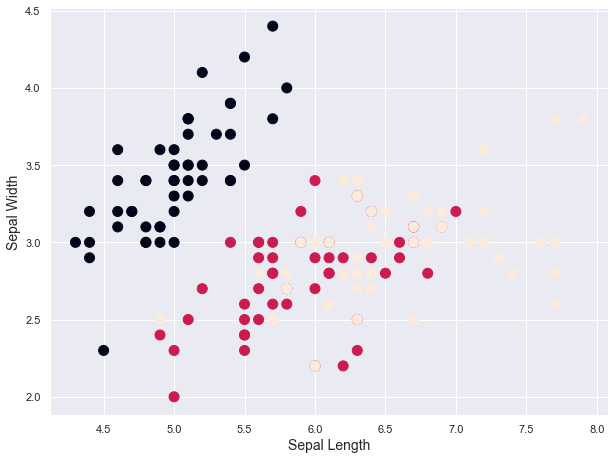

In [220]:
fig = plt.figure(figsize=(10, 7.5))
plt.scatter(X[:,0], X[:,1], c=y, s=100)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)

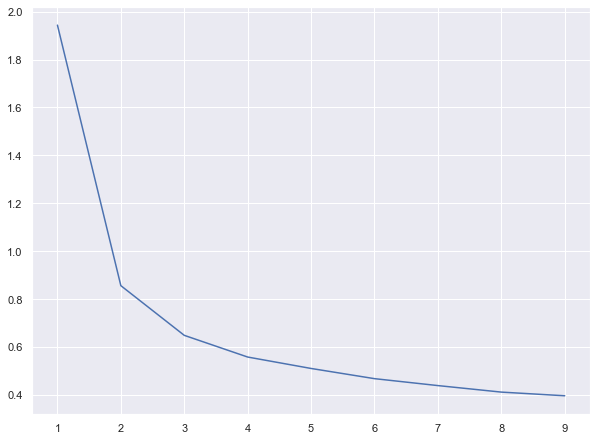

In [221]:
#K-means clustering
mean_dist = []   #initialize mean distance list
max_k = 10       #variable to set maximum number of clusters

#create for loop to test each number of clusters
for k in range(1, max_k):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    mean_dist.append(sum(np.min(cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
#plot the values created by the loop so we can examine where the elbow is
fig = plt.figure(figsize=(10, 7.5))
plt.plot(range(1, max_k), mean_dist)

#graph tells us that we should pick something between 2 and 4, so we pick 3

In [222]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'Predicted')

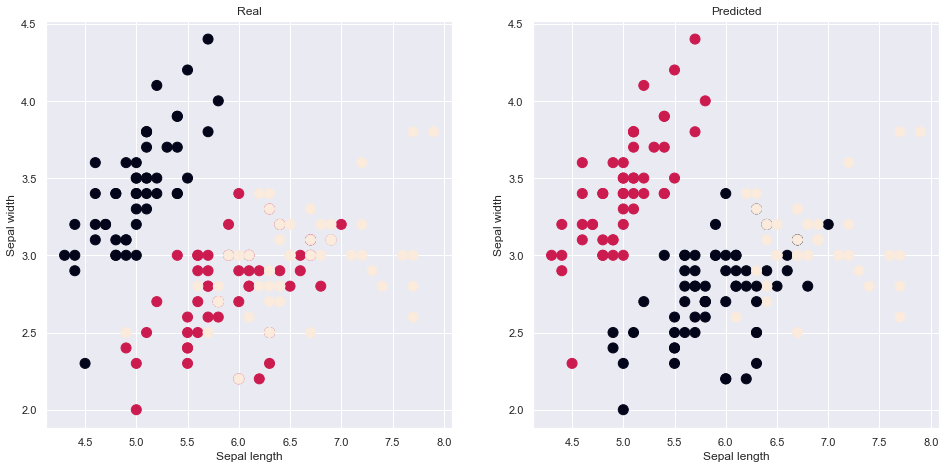

In [226]:
#plot how this clustering looks compared to the actual data
fig, ax = plt.subplots(1, 2, figsize=(16, 7.5))

ax[0].scatter(X[:,0], X[:,1], c=y, s=100)
ax[0].set_xlabel('Sepal length')
ax[0].set_ylabel('Sepal width')
ax[0].set_title('Real')

ax[1].scatter(X[:,0], X[:,1], c=km.labels_, s=100)
ax[1].set_xlabel('Sepal length')
ax[1].set_ylabel('Sepal width')
ax[1].set_title('Predicted')

#not perfect but reasonable

### Hierarchical Clustering

In [227]:
from scipy.cluster.hierarchy import dendrogram, linkage
L = linkage(X, 'ward')

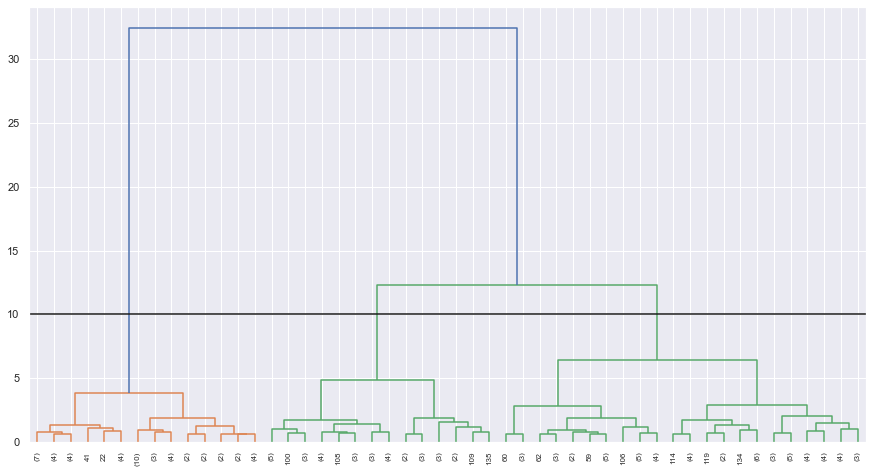

In [230]:
plt.figure(figsize=(15, 8))

dendrogram(L, truncate_mode='lastp', p=50)  #p refers to #of observations
plt.axhline(y=10, c='k')   #y is where we draw our line to decide how many categories
plt.show()

# Example: NFL Punt Competition

## Understanding the problem

##### Challenge: Reduce occurrence of concussions by proposing specific rule modification
##### Evaluation: Efficacy and game integrity

###### Efficacy: Demonstrate understanding, easy to understand, reproducible
###### Game Integrity: needs to be actionable and introduce no new risks to player safety

###### Hypothesis: We can reduce the amount of concussions during punt plays by modifying the rules of the game

###### Additional Hypotheses: Faster players are more prone to concussions, shorter players are more prone, occur at end of game

In [232]:
#all of this was done in my Kaggle notebook entitled nfl punt